In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pickle
import collections
plt.rcParams.update({'font.size': 15})

In [4]:
data=pd.read_pickle('stage_2_combined_clusters_TOC_WCA.pkl')
data.head()

,WELL,PEFWS,GRWS,DENWS,DTWS,DRESWS,Interval,facies_km,facies_hc,facies_sc,S2,TOC,LOM,dlogR
11008.0,ANASAZI `16` STATE 1,2.865,103.895,2.594,68.471,15.191,WC A,0,1,1,2.585085,1.319427,9.847191,0.305908
11008.5,ANASAZI `16` STATE 1,2.809,98.146,2.595,67.866,14.876,WC A,0,1,1,2.405933,1.227988,9.847191,0.284708
11009.0,ANASAZI `16` STATE 1,2.764,93.175,2.598,67.542,14.776,WC A,0,1,1,2.326419,1.187404,9.847191,0.275299
11009.5,ANASAZI `16` STATE 1,2.820,87.963,2.601,67.714,15.113,WC A,0,1,1,2.438252,1.244483,9.847191,0.288533
11010.0,ANASAZI `16` STATE 1,2.938,86.100,2.597,68.097,15.504,WC A,0,1,1,2.596725,1.325368,9.847191,0.307286


In [8]:
key=np.unique(data['WELL'])

In [9]:
## use this only when the above data is for all 31 wells

key_a=np.unique(data['WELL'].loc[data['Interval']=='WC A'])
key_b=np.unique(data['WELL'].loc[data['Interval']=='WC B'])
key_c=np.unique(data['WELL'].loc[data['Interval']=='WC C'])
key_d1=np.unique(data['WELL'].loc[data['Interval']=='WC D lower'])
key_d2=np.unique(data['WELL'].loc[data['Interval']=='WC D upper'])

In [9]:
key

array(['ANASAZI `16` STATE 1', 'ANGUS 7 STATE 1', 'BILBREY `32` STATE 1',
       'BOUNDS 25 COM 1', 'COTTON DRAW `9L` FE 1',
       'GERONIMO 28 STATE C 1', 'GURNEY 3 STATE 1',
       'LANCASTER SPRING UN 3', 'MADERA 24 FEDERAL 1',
       'MERCHANT 8 FEDERAL 1', 'MILLARD DECK ESTATE 1',
       'MURCHINSON `2` STAT 1', 'PALOMA 30 FEDERAL 2',
       'PLU BIG SINKS 11 FE 1H PILOT', 'PRICE ESTATE UNIT 1 3',
       'SCHLOSSER FRED ESTA 2-D', 'TYRRELL W C UNIT 1 4',
       'UNIVERSITY 10-18 `A 7', 'UNIVERSITY 11-18 `A 5',
       'UNIVERSITY 16-18 `A 1', 'UNIVERSITY 16-18 `B 1',
       'UNIVERSITY 17-18 1H', 'UNIVERSITY 20-16 1', 'UNIVERSITY 20-5 1',
       'WHITE CITY UNIT COM 2'], dtype=object)

In [43]:
def plot_pie (well):
    df=data.loc[(data['WELL']==well)]
    count=[]
    for i in [0, 2, 3, 4, 5]:
        count.append(len(df.loc[df['facies_km']==i]))
    percentage=np.array(count)/sum(count)*100
    labels=['Siltstone', 'Carbonate', 'Facies 3', 'Facies 4', 'Facies 5']
    colors=['#ffff00','#000000','#996633','#cc9900','#999966']
    fig, ax= plt.subplots()
    ax.pie(percentage, labels=labels, shadow=True, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.tick_params(labelsize=16)
    ax.axis('equal')
    ax.set_title('Well: %s'%well)
    plt.legend(bbox_to_anchor=(1.4, 0.6), fontsize=12)
    plt.show()
    #return percentage

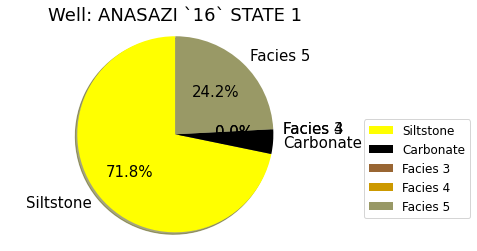

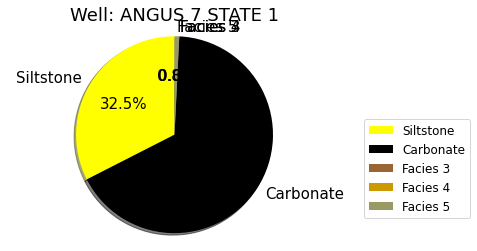

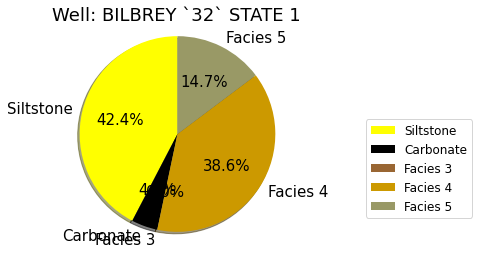

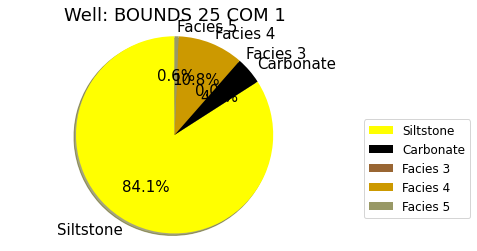

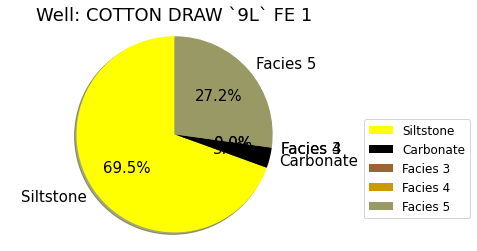

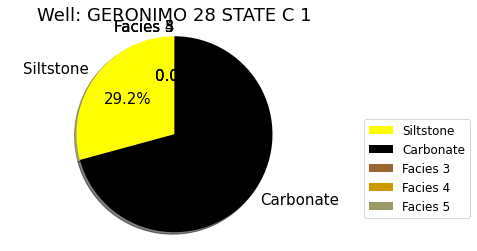

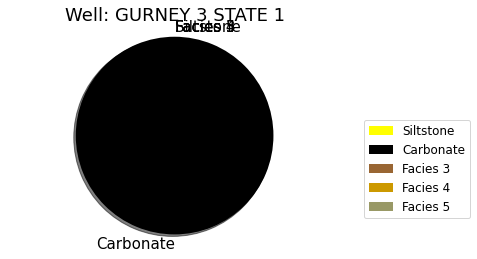

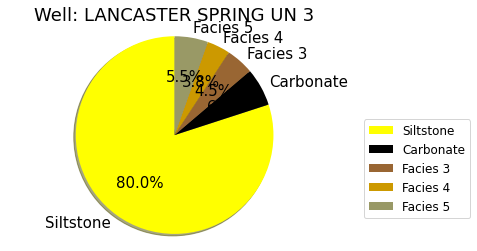

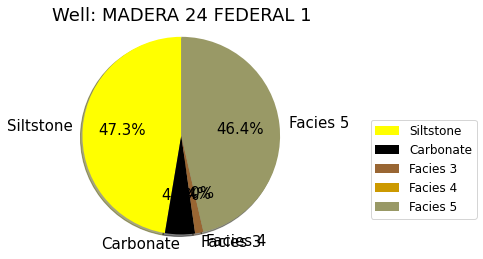

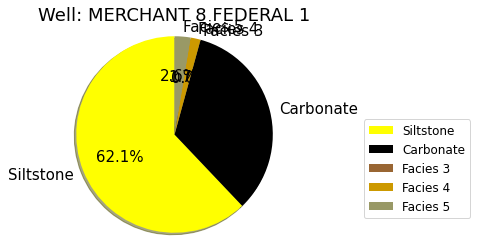

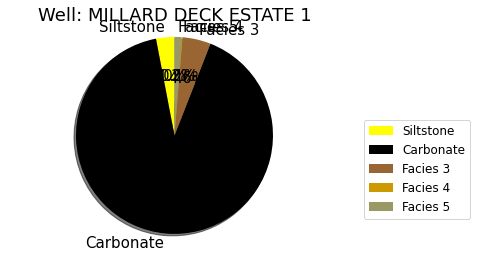

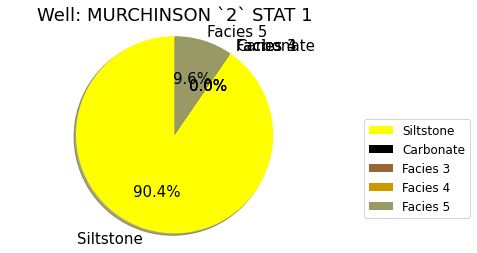

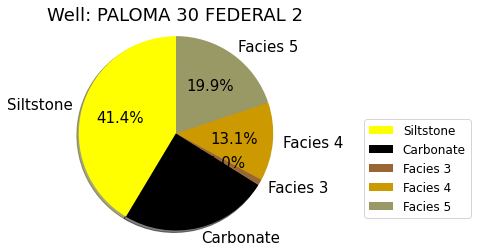

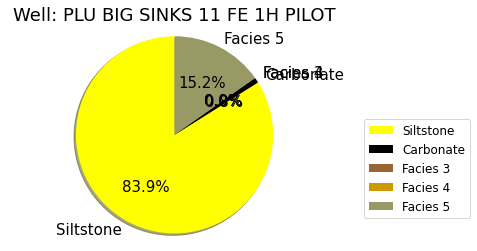

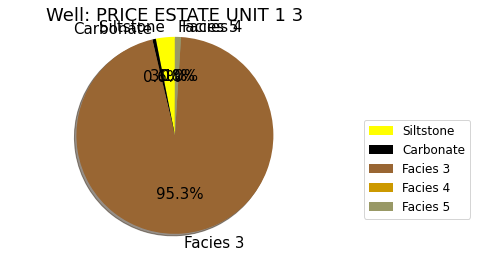

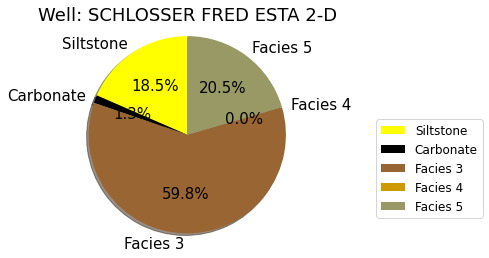

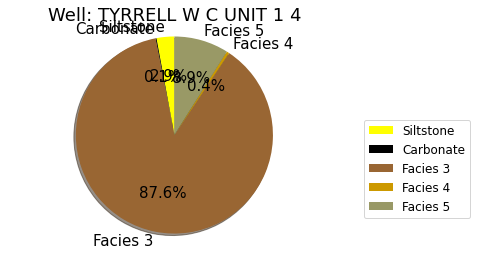

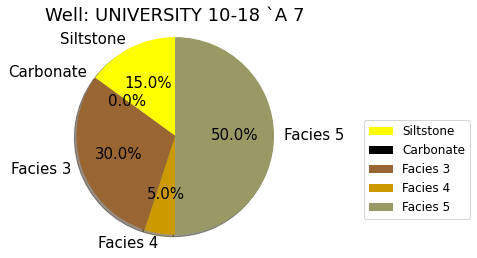

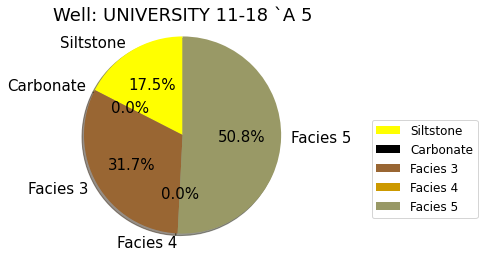

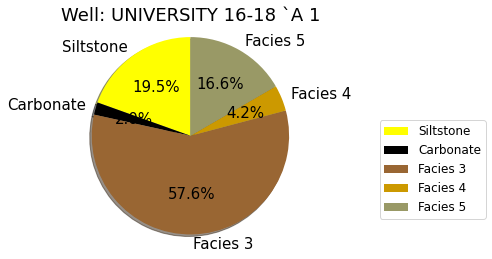

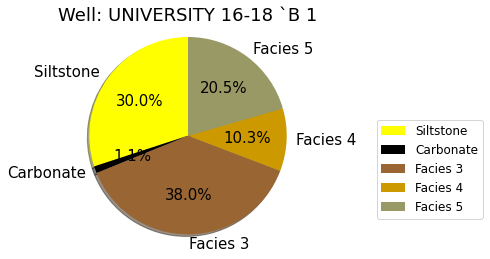

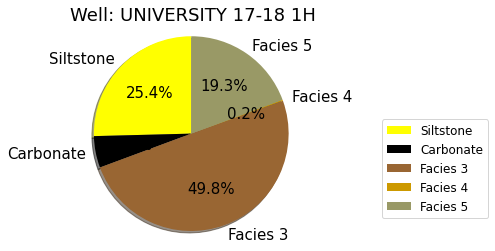

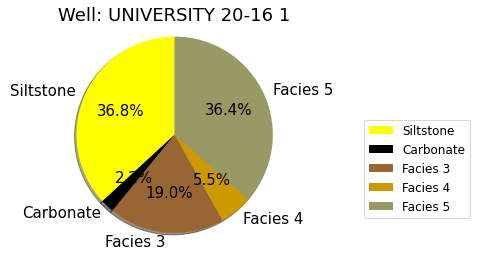

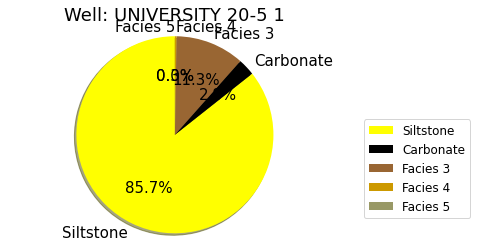

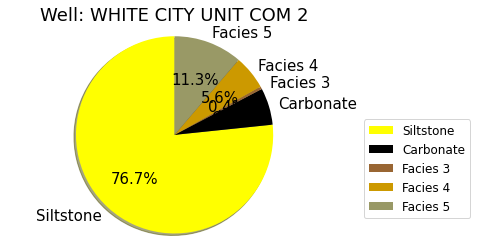

In [44]:
for well in key:
    plot_pie(well)


## Adding % of lithofacies to data

In [33]:
df_info=pd.read_pickle('stage_2_25_well_info.pkl')
df_info.head()

,Well Name,UWI,Surf X,Surf Y,LOM,p10,p50,p90
0,PRICE ESTATE UNIT 1 3,4.24E+13,2280607.0,11267636.3,9.275141,3.054084,4.818053,5.919994
1,TYRRELL W C UNIT 1 4,4.24E+13,2277136.9,11272178.5,9.284070,2.463833,4.216308,5.563309
2,SCHLOSSER FRED ESTA 2-D,4.24E+13,2209224.3,11298339.1,9.164483,4.633583,5.721014,7.356629
3,UNIVERSITY 20-5 1,4.23E+13,2152070.6,11524191.5,10.115581,0.793428,3.238556,4.923558
4,UNIVERSITY 10-18 `A 7,4.25E+13,2181957.9,11482911.2,9.722841,4.102100,5.554948,7.369827


In [34]:
len(df_info)

25

In [35]:
df_info['siltstone_%']=0
df_info['carbonate_%']=0
df_info['facies_3_%']=0
df_info['facies_4_%']=0
df_info['facies_5_%']=0
df_info.head()

,Well Name,UWI,Surf X,Surf Y,LOM,p10,p50,p90,siltstone_%,carbonate_%,facies_3_%,facies_4_%,facies_5_%
0,PRICE ESTATE UNIT 1 3,4.24E+13,2280607.0,11267636.3,9.275141,3.054084,4.818053,5.919994,0,0,0,0,0
1,TYRRELL W C UNIT 1 4,4.24E+13,2277136.9,11272178.5,9.284070,2.463833,4.216308,5.563309,0,0,0,0,0
2,SCHLOSSER FRED ESTA 2-D,4.24E+13,2209224.3,11298339.1,9.164483,4.633583,5.721014,7.356629,0,0,0,0,0
3,UNIVERSITY 20-5 1,4.23E+13,2152070.6,11524191.5,10.115581,0.793428,3.238556,4.923558,0,0,0,0,0
4,UNIVERSITY 10-18 `A 7,4.25E+13,2181957.9,11482911.2,9.722841,4.102100,5.554948,7.369827,0,0,0,0,0


In [38]:
for i in df_info.index:
    well=df_info['Well Name'].iloc[i]
    df=data.loc[data['WELL']==well]
    count=[]
    for f in [0, 2, 3, 4, 5]:
        count.append(len(df.loc[df['facies_km']==f]))
    perc=np.array(count)/sum(count)*100
    df_info['siltstone_%'].iloc[i]=perc[0]
    df_info['carbonate_%'].iloc[i]=perc[1]
    df_info['facies_3_%'].iloc[i]=perc[2]
    df_info['facies_4_%'].iloc[i]=perc[3]
    df_info['facies_5_%'].iloc[i]=perc[4]

D:\Programs\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
df_info

,Well Name,UWI,Surf X,Surf Y,LOM,p10,p50,p90,siltstone_%,carbonate_%,facies_3_%,facies_4_%,facies_5_%
0,PRICE ESTATE UNIT 1 3,4.24E+13,2280607.0,11267636.3,9.275141,3.054084,4.818053,5.919994,3.111740,0.565771,95.332390,0.000000,0.990099
1,TYRRELL W C UNIT 1 4,4.24E+13,2277136.9,11272178.5,9.284070,2.463833,4.216308,5.563309,2.928258,0.146413,87.554905,0.439239,8.931186
2,SCHLOSSER FRED ESTA 2-D,4.24E+13,2209224.3,11298339.1,9.164483,4.633583,5.721014,7.356629,18.464351,1.279707,59.780622,0.000000,20.475320
3,UNIVERSITY 20-5 1,4.23E+13,2152070.6,11524191.5,10.115581,0.793428,3.238556,4.923558,85.654596,2.785515,11.281337,0.278552,0.000000
4,UNIVERSITY 10-18 `A 7,4.25E+13,2181957.9,11482911.2,9.722841,4.102100,5.554948,7.369827,15.000000,0.000000,30.000000,5.000000,50.000000
5,UNIVERSITY 11-18 `A 5,4.25E+13,2184376.3,11480214.1,9.700128,4.022949,5.390872,6.529765,17.460317,0.000000,31.746032,0.000000,50.793651
6,UNIVERSITY 20-16 1,4.23E+13,2158497.6,11514398.1,10.065899,0.748019,3.368410,5.383835,36.834734,2.240896,19.047619,5.462185,36.414566
7,UNIVERSITY 17-18 1H,4.25E+13,2213314.5,11458580.8,9.665328,3.589590,5.227637,7.158693,25.409836,5.245902,49.836066,0.163934,19.344262
8,UNIVERSITY 16-18 `B 1,4.25E+13,2190309.5,11449776.5,9.567161,1.332976,4.690053,6.945259,30.038023,1.140684,38.022814,10.266160,20.532319
9,MURCHINSON `2` STAT 1,3.00E+13,1870346.0,11674210.6,10.097984,0.033544,0.866718,3.554828,90.410959,0.000000,0.000000,0.000000,9.589041


In [45]:
df_info.to_pickle('stage_2_25_well_info.pkl')

In [46]:
df_info.to_csv('stage_2_25_well_info.csv')